# Telecommunication Company Churn Analysis-Classification Model
## 1. Business Understanding
- Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

- In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

### Business objectives

1. Help the client, a telecommunication company, to understand their data.
2. Find the lifetime value of each customer.
3. Know what factors affect the rate at which customers stop using their network.
4. Predict if a customer will churn or not.

## Hypothesis

Null: is no significant association between churn and contract 
Alternative: There is significant association between churn and contract


## 5 Analystic Question 

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?


4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?


## 2. Data Understanding
### The data for this project is in a csv format. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -upgrade pyodbc

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
%pip install tabulate

#### - Import all the necessary packages

In [7]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import GradientBoostingClassifier
import warnings 
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import os
import pickle

warnings.filterwarnings('ignore')

###  - Create your .env file in the root of your project
#### - In the .env file, put all your sensitive information like server name, password etc
####  - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.
####  - Create a connection by accessing your connection string with your defined environment variables

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [8]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [11]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

# Data for the Project
First dataset - First 3000 records of the dataset was extracted from Microsoft SQL Server
Second dataset - The second 2000 records of the dataset was downloaded from OneDrive
Third dataset - The third part of the data was downloaded from a GitHub Repository

In [12]:
# Now the sql query to get the data is what what you see below. 


query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

In [13]:
#save the data as a csv file 
data.to_csv('data.csv', index=False)

In [14]:
# get the the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


### we can see that there are missing values in some of the columns

In [15]:
# Generate descriptive statistics
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [16]:
# check the number of unique values in each attribute
data.nunique()

customerID          3000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1198
TotalCharges        2893
Churn                  2
dtype: int64

In [17]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
data2 = pd.read_excel("Telco-churn-second-2000.xlsx")
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [19]:
data2.shape

(2000, 20)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


### we can see there are no missing values in the test dataset

In [21]:
data2.nunique()

customerID          2000
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       986
TotalCharges        1930
dtype: int64

In [22]:
# Save the data as a CSV file
data2.to_csv('data2.csv', index=False)

In [23]:
data3 = pd.read_csv("LP2_Telco-churn-last-2000.csv")
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [24]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### the third dataset does not also have null values

In [25]:
data3.nunique()

customerID          2043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1029
TotalCharges        1991
Churn                  2
dtype: int64

In [26]:
# Save the data as a CSV file
data3.to_csv('data3.csv', index=False)

In [27]:
# Display the info of data1
print("Info of data1:")
print(data.info())

# Display the info of data2
print("\nInfo of data2:")
print(data3.info())

Info of data1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-

## 3.2 Exploratory Data Analysis: EDA
### in this section we inspect the datasets in depth and conduct a univariate, bivariate and multivariate analysis and test the hypothesis to further understand the patterns and trends in the dataset.

### lets look at the unique values of each column in the training datasets and handle inconsistencies to merge the two datasets

In [28]:
# Compare the two DataFrames data and data3 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3 = pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 3'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 3               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

In [29]:
# lets first drop the customer ID column as we do need it for this analysis
data=data.drop('customerID', axis=1)
data3=data3.drop('customerID', axis=1)

In [30]:
# replacing the encoded column values with No and Yes to match with the first training set
data3['SeniorCitizen']=data3['SeniorCitizen'].replace([0,1],['No','Yes'])
data3['SeniorCitizen'].value_counts()

SeniorCitizen
No     1699
Yes     344
Name: count, dtype: int64

In [31]:
#  lets convert boolean-like values (e.g., 'True' and 'False') to more human-readable forms (e.g., 'Yes' and 'No') to match with the second dataset
data['SeniorCitizen'] = data['SeniorCitizen'].replace([False,True], ['No', 'Yes'])
data['Partner'] = data['Partner'].replace([False, True],['No','Yes'])
data['Dependents'] = data['Dependents'].replace([False, True],['No','Yes'])
data['PhoneService'] = data['PhoneService'].replace([False, True],['No','Yes'])
data['MultipleLines'] = data['MultipleLines'].replace([False, True],['No','Yes'])
data['OnlineSecurity'] = data['OnlineSecurity'].replace([False, True],['No','Yes'])
data['OnlineBackup'] = data['OnlineBackup'].replace([False, True],['No','Yes'])
data['DeviceProtection'] = data['DeviceProtection'].replace([False, True],['No','Yes'])
data['TechSupport'] = data['TechSupport'].replace([False, True],['No','Yes'])
data['StreamingTV'] = data['StreamingTV'].replace([False, True],['No','Yes'])
data['StreamingMovies'] = data['StreamingMovies'].replace([False, True],['No','Yes'])
data['PaperlessBilling'] = data['PaperlessBilling'].replace([False, True],['No','Yes'])
data['Churn'] = data['Churn'].replace([False, True],['No','Yes'])

In [32]:
print(data['SeniorCitizen'].value_counts())
print(data3['SeniorCitizen'].value_counts())
print(data['Partner'].value_counts())
print(data3['Partner'].value_counts())
print(data['Dependents'].value_counts())
print(data3['Dependents'].value_counts())
print(data['PhoneService'].value_counts())
print(data3['PhoneService'].value_counts())
print(data['MultipleLines'].value_counts())
print(data3['MultipleLines'].value_counts())
print(data['OnlineSecurity'].value_counts())
print(data3['OnlineSecurity'].value_counts())
print(data['DeviceProtection'].value_counts())
print(data3['DeviceProtection'].value_counts())
print(data['TechSupport'].value_counts())
print(data3['TechSupport'].value_counts())
print(data['StreamingTV'].value_counts())
print(data3['StreamingTV'].value_counts())
print(data['PaperlessBilling'].value_counts())
print(data3['PaperlessBilling'].value_counts())
print(data['Churn'].value_counts())
print(data3['Churn'].value_counts())

SeniorCitizen
No     2525
Yes     475
Name: count, dtype: int64
SeniorCitizen
No     1699
Yes     344
Name: count, dtype: int64
Partner
No     1538
Yes    1462
Name: count, dtype: int64
Partner
No     1047
Yes     996
Name: count, dtype: int64
Dependents
No     2070
Yes     930
Name: count, dtype: int64
Dependents
No     1412
Yes     631
Name: count, dtype: int64
PhoneService
Yes    2731
No      269
Name: count, dtype: int64
PhoneService
Yes    1823
No      220
Name: count, dtype: int64
MultipleLines
No     1437
Yes    1294
Name: count, dtype: int64
MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64
OnlineSecurity
No     1478
Yes     871
Name: count, dtype: int64
OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64
DeviceProtection
No     1296
Yes    1053
Name: count, dtype: int64
DeviceProtection
No                     923
Yes                    691
No i

In [33]:
# Confirm the dtypes of the two DataFrames data and data3 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3 = pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 3'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 3               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
gender                object           3000      object           2043
SeniorCitizen         object           3000      object           2043
Partner               object           3000      object           2043
Dependents            object           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService          object           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
DeviceProtection      object           2349      object           2043
TechSu

In [34]:
# lets convert the TotalCharges column to a float
# Replace empty strings with NaN
data3['TotalCharges'] = data3['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' column to float data type
data3['TotalCharges'] = data3['TotalCharges'].astype('float64')

In [35]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2043 non-null   object 
 1   SeniorCitizen     2043 non-null   object 
 2   Partner           2043 non-null   object 
 3   Dependents        2043 non-null   object 
 4   tenure            2043 non-null   int64  
 5   PhoneService      2043 non-null   object 
 6   MultipleLines     2043 non-null   object 
 7   InternetService   2043 non-null   object 
 8   OnlineSecurity    2043 non-null   object 
 9   OnlineBackup      2043 non-null   object 
 10  DeviceProtection  2043 non-null   object 
 11  TechSupport       2043 non-null   object 
 12  StreamingTV       2043 non-null   object 
 13  StreamingMovies   2043 non-null   object 
 14  Contract          2043 non-null   object 
 15  PaperlessBilling  2043 non-null   object 
 16  PaymentMethod     2043 non-null   object 


## checking missing values

In [36]:
# lets look at the missing values in the first training set
data.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [37]:
# drop the missing value in the churn attribute
data=data.dropna(subset='Churn')

In [38]:
# lets look at the missing values in the second training set
data3.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

In [39]:
# now lets merge the training dataset and do a univariate, bivariate and multivariate analysis
df_train=pd.concat([data,data3])

In [40]:
# save the merged dataset
# Define the file path to save the CSV file on your desktop

df_train.to_csv('df_train.csv',  index=False)

In [41]:
# lets check the missing values in the merged train datasets
df_train.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64

## Handle outliers

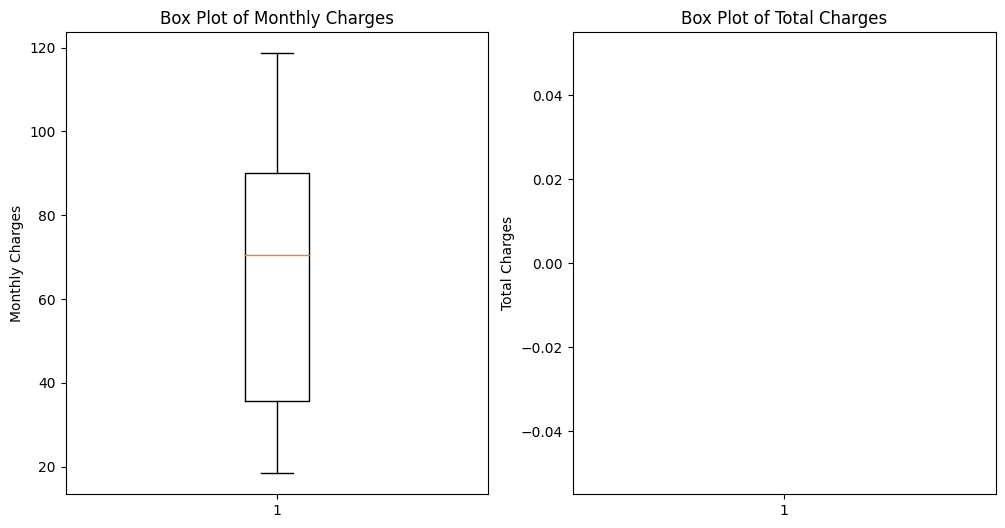

In [42]:
# we have handled the null values in training data now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(df_train['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(df_train['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()

In [43]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of MonthlyCharges
Q1 = df_train['MonthlyCharges'].quantile(0.25)
Q3 = df_train['MonthlyCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in MonthlyCharges
num_outliers = df_train[(df_train['MonthlyCharges'] < lower_bound) | (df_train['MonthlyCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in MonthlyCharges:", num_outliers)

Number of outliers in MonthlyCharges: 0


In [44]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of TotalCharges
Q1 = df_train['TotalCharges'].quantile(0.25)
Q3 = df_train['TotalCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in TotalCharges
num_outliers = df_train[(df_train['TotalCharges'] < lower_bound) | (df_train['TotalCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in TotalCharges:", num_outliers)

Number of outliers in TotalCharges: 0


## Handle duplicates

In [45]:
# now that we have confirmed that there are no outliers, lets look at the duplicates
print("Number of duplicates in train dataset:", df_train.duplicated().sum())

Number of duplicates in train dataset: 10


In [46]:
# lets have a look at the duplicates
# check the duplicate rows
df_train.loc[df_train.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.700001,45.700001,Yes
1338,Male,No,No,No,1,Yes,No,No,None,None,None,None,None,None,Month-to-month,No,Mailed check,20.150000,20.150000,Yes
1491,Female,No,No,No,1,Yes,No,No,None,None,None,None,None,None,Month-to-month,No,Mailed check,19.549999,19.549999,No
1739,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.900002,69.900002,Yes
1932,Male,No,No,No,1,Yes,No,No,None,None,None,None,None,None,Month-to-month,No,Mailed check,20.200001,20.200001,No
2713,Male,No,No,No,1,Yes,No,No,None,None,None,None,None,None,Month-to-month,Yes,Mailed check,20.450001,20.450001,No
2892,Male,No,No,No,1,Yes,No,No,None,None,None,None,None,None,Month-to-month,No,Mailed check,20.450001,20.450001,No
759,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.150000,70.150000,Yes
1764,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.200000,69.200000,Yes
1774,Female,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.650000,19.650000,No


In [47]:
# locking rows without duplicates
# remove duplicate rows based on the specified subset of columns
df_train=df_train.loc[~df_train.duplicated(subset=['MonthlyCharges','TotalCharges'])].reset_index(drop=True).copy()

In [48]:
# lets confirm weather we still have any duplicates
df_train.duplicated().sum()

0

In [49]:
# save the clean train dataset


df_train.to_csv('df_train',  index=False)

In [50]:
# lets take a look at the test dataset
# Confirm the dtypes of the training and test data side-by-side

# Create custom summary DataFrames for each DataFrame
summary_train = pd.DataFrame({'Column Name': df_train.columns, 'Data Type': df_train.dtypes, 'Non-Null Count': df_train.count()})
summary_test = pd.DataFrame({'Column Name': data2.columns, 'Data Type': data2.dtypes, 'Non-Null Count': data2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_train.set_index('Column Name', inplace=True)
summary_test.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_train, summary_test], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
gender                object         4935.0      object         2000.0
SeniorCitizen         object         4935.0       int64         2000.0
Partner               object         4935.0      object         2000.0
Dependents            object         4935.0      object         2000.0
tenure                 int64         4935.0       int64         2000.0
PhoneService          object         4935.0      object         2000.0
MultipleLines         object         4669.0      object         2000.0
InternetService       object         4935.0      object         2000.0
OnlineSecurity        object         4315.0      object         2000.0
OnlineBackup          object         4315.0      object         2000.0
DeviceProtection      object         4315.0      object         2000.0
TechSu

In [51]:
# replacing the encoded column values in test set with No and Yes to match with the training set and allow transformation
data2['SeniorCitizen']=data2['SeniorCitizen'].replace([0,1],['No','Yes'])
data2['SeniorCitizen'].value_counts()

SeniorCitizen
No     1677
Yes     323
Name: count, dtype: int64

In [52]:
data2['InternetService'].value_counts()

InternetService
Fiber optic    848
DSL            706
No             446
Name: count, dtype: int64

In [53]:
df_train['InternetService'].value_counts()

InternetService
Fiber optic    2222
DSL            1691
No             1022
Name: count, dtype: int64

In [54]:
# lets convert the test dataset TotalCharges column to a float
# Replace empty strings with NaN
data2['TotalCharges'] = data2['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' column to float data type
data2['TotalCharges'] = data2['TotalCharges'].astype('float64')

In [55]:
# check for missing values\
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [56]:
# Drop the 'customerID' column from data2
data2.drop('customerID', axis=1, inplace=True)

In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


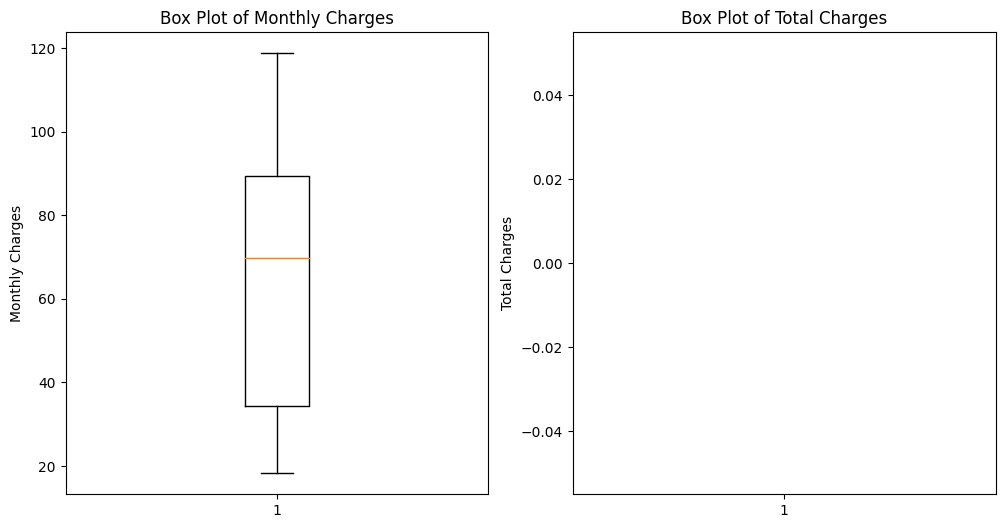

In [58]:
# now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(data2['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(data2['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()

In [59]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of TotalCharges
Q1 = data2['TotalCharges'].quantile(0.25)
Q3 = data2['TotalCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in TotalCharges
num_outliers = data2[(data2['TotalCharges'] < lower_bound) | (data2['TotalCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in TotalCharges:", num_outliers)

Number of outliers in TotalCharges: 2


In [60]:
# lets remove the outliers in totalcharges by replacing with median
data2 = data2[(data2['TotalCharges'] >= lower_bound) & (data2['TotalCharges'] <= upper_bound)]

In [61]:
# now lets look at the duplicates
print("Number of duplicates:", data2.duplicated().sum())

Number of duplicates: 3


In [62]:
# lets remove the duplicates
# locking rows without duplicates
# remove duplicate rows based on the specified subset of columns
data2=data2.loc[~data2.duplicated(subset=['MonthlyCharges','TotalCharges'])].reset_index(drop=True).copy()

In [63]:
# now lets confirm weather we still have any duplicates
print("Number of duplicates:", data2.duplicated().sum())

Number of duplicates: 0


In [64]:
# save the clean test dataset

data2.to_csv('data2.csv',  index=False)

In [65]:
# read the test data
df_test=pd.read_csv('data2.csv')

In [66]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
# lets check whether the values match in both the training and test dataset to avoid errors during feature engineering
print(df_train['SeniorCitizen'].value_counts())
print(df_test['SeniorCitizen'].value_counts())
print(df_train['Partner'].value_counts())
print(df_test['Partner'].value_counts())
print(df_train['Dependents'].value_counts())
print(df_test['Dependents'].value_counts())
print(df_train['PhoneService'].value_counts())
print(df_test['PhoneService'].value_counts())
print(df_train['MultipleLines'].value_counts())
print(df_test['MultipleLines'].value_counts())
print(df_train['OnlineSecurity'].value_counts())
print(df_test['OnlineSecurity'].value_counts())
print(df_train['DeviceProtection'].value_counts())
print(df_test['DeviceProtection'].value_counts())
print(df_train['TechSupport'].value_counts())
print(df_test['TechSupport'].value_counts())
print(df_train['StreamingTV'].value_counts())
print(df_test['StreamingTV'].value_counts())
print(df_train['PaperlessBilling'].value_counts())
print(df_test['PaperlessBilling'].value_counts())
print(df_train['InternetService'].value_counts())
print(df_test['InternetService'].value_counts())
print(df_train['OnlineBackup'].value_counts())
print(df_test['OnlineBackup'].value_counts())
print(df_train['StreamingMovies'].value_counts())
print(df_test['StreamingMovies'].value_counts())
print(df_train['Contract'].value_counts())
print(df_test['Contract'].value_counts())
print(df_train['PaymentMethod'].value_counts())
print(df_test['PaymentMethod'].value_counts())

SeniorCitizen
No     4126
Yes     809
Name: count, dtype: int64
SeniorCitizen
No     1639
Yes     319
Name: count, dtype: int64
Partner
No     2494
Yes    2441
Name: count, dtype: int64
Partner
No     1026
Yes     932
Name: count, dtype: int64
Dependents
No     3397
Yes    1538
Name: count, dtype: int64
Dependents
No     1421
Yes     537
Name: count, dtype: int64
PhoneService
Yes    4449
No      486
Name: count, dtype: int64
PhoneService
Yes    1767
No      191
Name: count, dtype: int64
MultipleLines
No                  2326
Yes                 2123
No phone service     220
Name: count, dtype: int64
MultipleLines
No                  931
Yes                 836
No phone service    191
Name: count, dtype: int64
OnlineSecurity
No                     2461
Yes                    1452
No internet service     402
Name: count, dtype: int64
OnlineSecurity
No                     974
Yes                    559
No internet service    425
Name: count, dtype: int64
DeviceProtection
No               

In [68]:
# handle inconsistency
df_test['InternetService']=df_test['InternetService'].replace('No','No Internet Service')
df_test['InternetService'].value_counts()

InternetService
Fiber optic            838
DSL                    695
No Internet Service    425
Name: count, dtype: int64

In [69]:
df_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## 3.3 Univariate Analysis
### 3.3.1 Analysis of tenure attribute

In [70]:
# lets look at the statistics
df_train['tenure'].describe()

count    4935.000000
mean       33.253293
std        24.341041
min         0.000000
25%        10.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [71]:
## categorization of tenure group to reveal trends and insights on customer churn across different tenure groups
# Define the bins for grouping tenure
bins = [0, 12, 24, 36, 48, 60, 1000]  

# Define labels for the bins
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']

# Group 'tenure' into bins
df_train['tenure_group'] = pd.cut(df_train['tenure'], bins=bins, labels=labels, right=False)
df_train['tenure_group'].value_counts()

tenure_group
0-12 months     1346
61+ months      1077
13-24 months     762
25-36 months     628
49-60 months     579
37-48 months     543
Name: count, dtype: int64

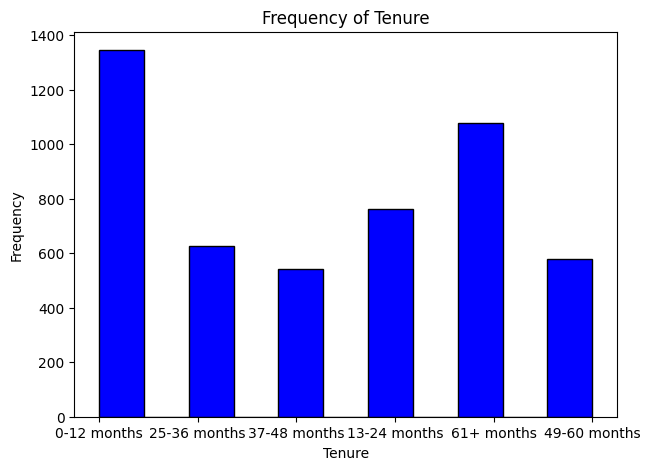

In [72]:
# now lets show the frequency distribution
plt.figure(figsize=(7,5))
plt.hist(df_train['tenure_group'],bins=11, color='blue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Frequency of Tenure')
plt.show();

### we can see that most of the customers have stayed for less than one 12 months

### Analysis of churn attiribute

In [73]:
churn_count = df_train['Churn'].value_counts()
churn_count

Churn
No     3655
Yes    1280
Name: count, dtype: int64

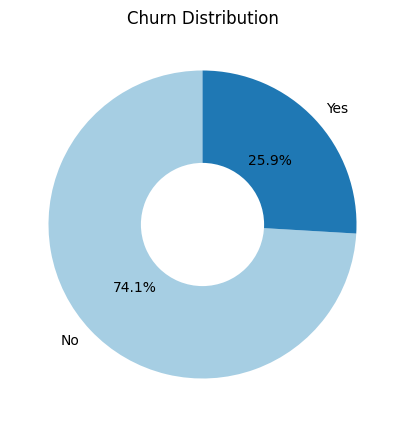

In [74]:
# lets see the distribution of churn
fig, ax = plt.subplots(figsize=(10, 5))
# Draw the outer pie chart
outer_colors = plt.cm.Paired(range(len(churn_count)))
ax.pie(churn_count.values, labels=churn_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
# Draw the inner pie chart to create the doughnut effect
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Churn Distribution')
plt.show()

### we can see that we have an imbalanced data as 74% of the total customers churned while 26% did not churn. this implies that we have to balance our data before training the model

### Analysis of total charges

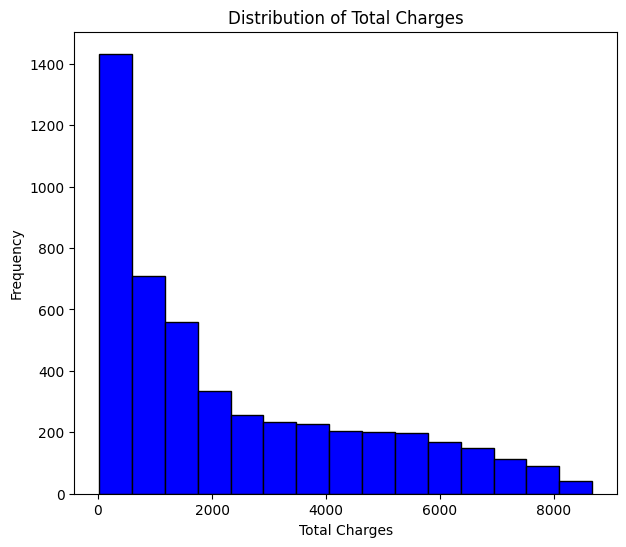

In [75]:
#Visualization of frequency distribution of total charges column

plt.figure(figsize=(7,6))
plt.hist(df_train['TotalCharges'], bins=15, color='b', edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')
plt.show()

### The distribution plot shows in detail the skewness of the total charges attribute of the dataset and it indicates a positively skewed distribution.

### Analysis of Gender Attribute

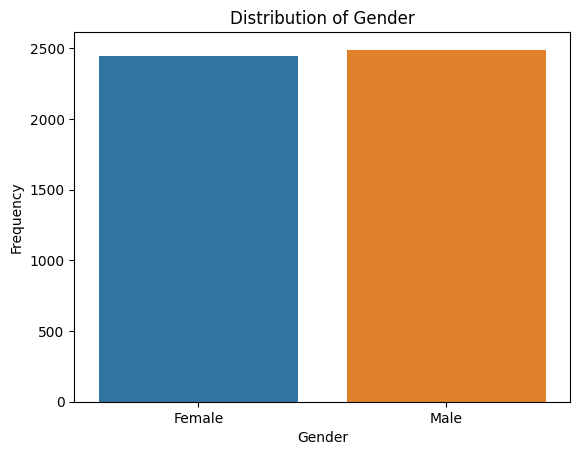

In [76]:
#Plot of Gender Distribution
sns.countplot(x=df_train['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

### Gender distribution is almost even, with Males exceeding females by a very small margin

### Analysis of payment method

In [77]:
# Visualization of Payment Method column

PaymentMethod_Count = df_train['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count

PaymentMethod
Mailed check                 1068
Credit card (automatic)      1086
Bank transfer (automatic)    1117
Electronic check             1664
Name: count, dtype: int64

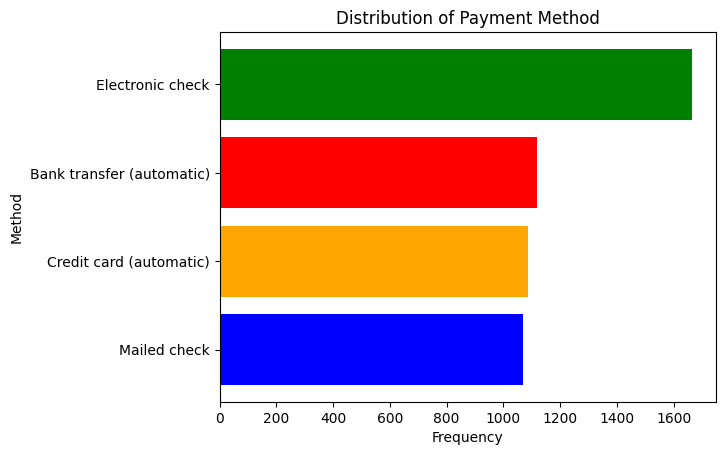

In [78]:
#Use of horizontal bar plot for visualization
c = ['blue', 'orange','red','green']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values, color = c)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=0)
plt.show();

### Visualization shows us that majority of the customers preffered Electronic Check as a method of payment.

### Analysis of internet service

In [79]:
# now lets have a look at the distribution of internet service providers
df_train['InternetService'].replace('No', 'No Internet Service', inplace=True)
InternetService_Count = df_train['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1022
DSL                    1691
Fiber optic            2222
Name: count, dtype: int64

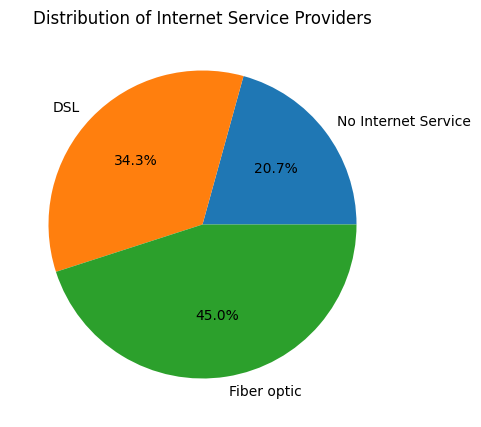

In [80]:
#Plotting a pie chart to visualize the internet service providers
plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

### Majority of customer's preffered Fibre optic for internet service provision

## Bivariate Analysis

### 1. How does gender impact customer churn? Are there significant differences in churn rates between male and female   customers?

In [81]:
# first lets group our data by gender and churn
grouped=pd.crosstab(df_train['gender'],df_train.Churn)
grouped['Churn_rate']=(grouped['Yes']/ (grouped['Yes'] + grouped['No']))*100
print(grouped['Churn_rate'])

gender
Female    26.022913
Male      25.853071
Name: Churn_rate, dtype: float64


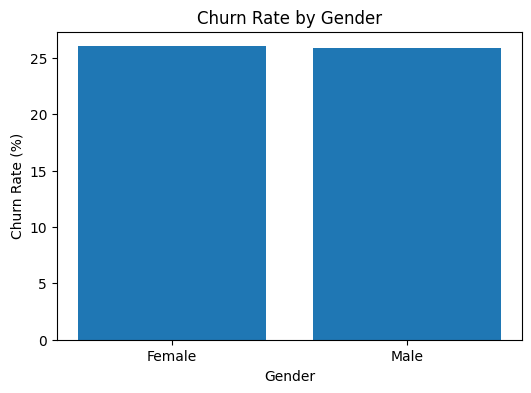

In [82]:
# Plotting 'gender' against churn rate
plt.figure(figsize=(6, 4))
plt.bar(grouped.index, grouped['Churn_rate'])
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()

### From the visualization we can see that there is no significant differences in churn rates between male and female   customers where 25.9% male churned while 26.1% female churned.

### 2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

In [83]:
# first lets group our data by partner and churn
grouped=pd.crosstab(df_train['Partner'],df_train.Churn)
grouped['Churn_rate']=(grouped['Yes']/ (grouped['Yes'] + grouped['No']))*100
print(grouped)

# lets group our data by dependents and churn
grouped2=pd.crosstab(df_train['Dependents'],df_train.Churn)
grouped2['Churn_rate']=(grouped2['Yes']/ (grouped2['Yes'] + grouped2['No']))*100
print(grouped2)

Churn      No  Yes  Churn_rate
Partner                       
No       1700  794   31.836407
Yes      1955  486   19.909873
Churn         No   Yes  Churn_rate
Dependents                        
No          2343  1054   31.027377
Yes         1312   226   14.694408


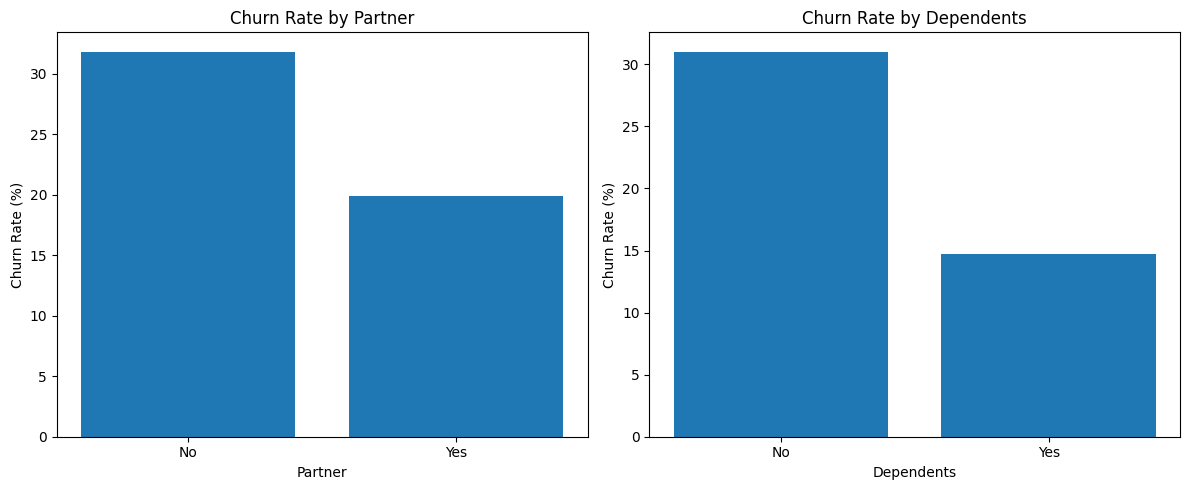

In [84]:
# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting 'Partner' against churn rate
axes[0].bar(grouped.index, grouped['Churn_rate'])
axes[0].set_xlabel('Partner')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Partner')

# Plotting 'Dependents' against churn rate
axes[1].bar(grouped2.index, grouped2['Churn_rate'])
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Dependents')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

### From the visualizations we can see that the presence of a partner or dependents do not influence customer churn as those without partners churned more compared to with partners. similarly, those without dependants churned more compared to those with dependants. we can deduce that customers in a family set up tend to stay longer compared to those without.

### 3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?

In [85]:
# first lets group our data by tenure group and churn
grouped3=pd.crosstab(df_train['tenure_group'],df_train.Churn)
grouped3['Churn_rate']=(grouped3['Yes']/ (grouped3['Yes'] + grouped3['No']))*100
print(grouped3)

Churn           No  Yes  Churn_rate
tenure_group                       
0-12 months    698  648   48.142645
13-24 months   532  230   30.183727
25-36 months   496  132   21.019108
37-48 months   436  107   19.705341
49-60 months   491   88   15.198618
61+ months    1002   75    6.963788


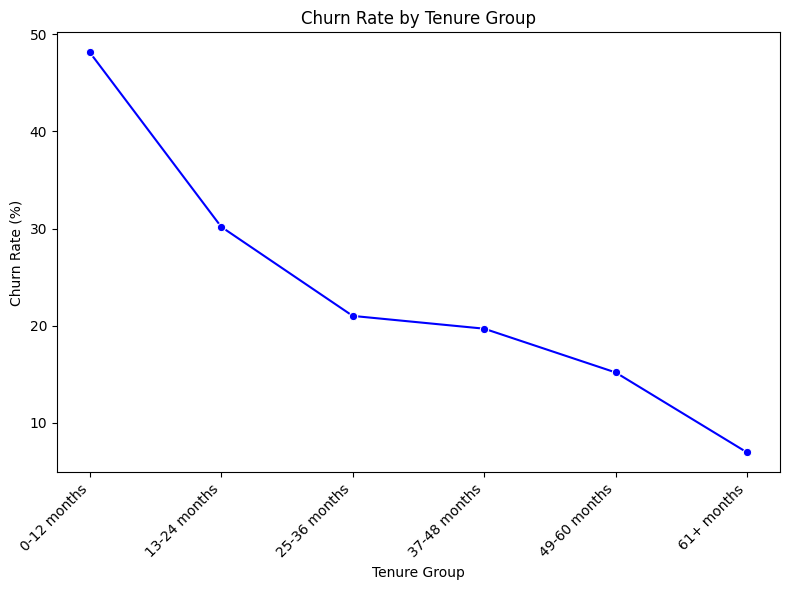

In [86]:
# Plotting churn rate against 'tenure_group'
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped3, x=grouped3.index, y='Churn_rate', marker='o', linestyle='-', color='b')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.grid(False)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

### What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

In [87]:
grouped8 = pd.crosstab(index=[df_train['OnlineSecurity'], df_train['OnlineBackup'], df_train['DeviceProtection'], df_train['TechSupport'], df_train['StreamingTV'], df_train['StreamingMovies']], columns=df_train['Churn'])
grouped8['Churn_rate']=(grouped8['Yes']/ (grouped8['Yes'] + grouped8['No']))*100
print(grouped8)

Churn                                                                                  No  \
OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        
No             No           No               No          No          No               214   
                                                                     Yes               47   
                                                         Yes         No                49   
                                                                     Yes               57   
                                             Yes         No          No                55   
...                                                                                   ...   
Yes            Yes          Yes              No          Yes         Yes               58   
                                             Yes         No          No                53   
                                                                     Y

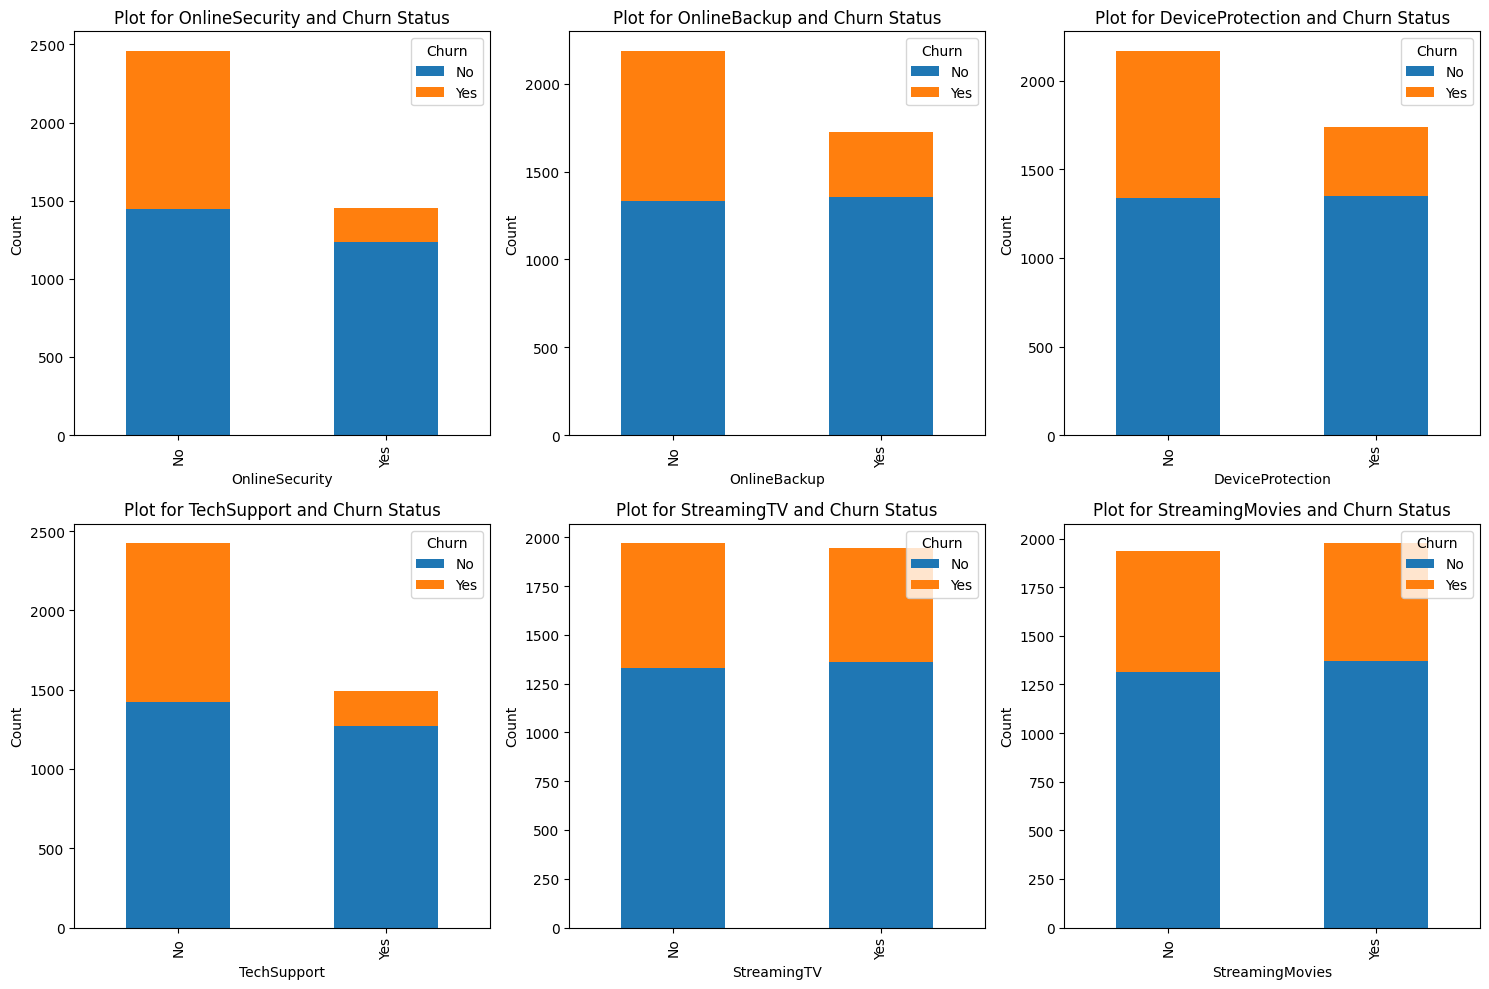

In [88]:
# lets visual the additional services and their churn status
grouped8 = grouped8.reset_index()  # Resetting index for better data handling

# Melt the dataframe for better visualization
melted_grouped8 = pd.melt(grouped8, id_vars=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn_rate'], var_name='Churn')

# List of categories to loop through and create stacked bar plots
categories = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a 2x3 grid for plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between plots

# Loop through categories and create stacked bar plots in the grid
for idx, category in enumerate(categories):
    ax_row = idx // 3
    ax_col = idx % 3
    ax = axes[ax_row, ax_col]

    sorted_melted_grouped8 = melted_grouped8[melted_grouped8[category] != 'No internet service']
    sorted_melted_grouped8 = sorted_melted_grouped8.sort_values(by='Churn_rate', ascending=False)

    # Pivot the data to prepare for stacked bar plot
    pivot_table = sorted_melted_grouped8.pivot_table(index=category, columns='Churn', values='value', aggfunc='sum')

    pivot_table.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Count')
    ax.set_title(f'Plot for {category} and Churn Status')
    ax.legend(title='Churn', loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

### From the visualization we can see that most customers do not have access to the additional services. however, additional services play a siginificant role in reducing customer churn. we can see that customers with additional services are less likely to churn considering the rate of churn. the rate of churn for customers without additional is about 1/3 compared to the rate of churn for customers with additional services which is about 1/5. Hence, we conclude that the company should ensure that their customers have access to additional services to reduce churn.

### 5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [89]:
# first lets group our data by contract term and churn
grouped9=pd.crosstab(df_train['Contract'],df_train.Churn)
grouped9['Churn_rate']=(grouped9['Yes']/ (grouped9['Yes'] + grouped9['No']))*100
print(grouped9)

Churn             No   Yes  Churn_rate
Contract                              
Month-to-month  1513  1128   42.711094
One year         930   122   11.596958
Two year        1212    30    2.415459


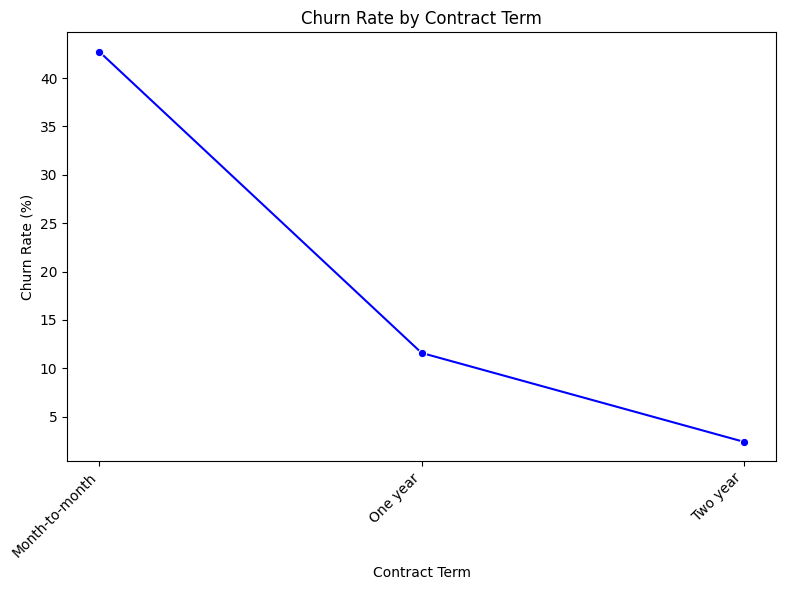

In [90]:
# Plotting churn rate against 'contract'
plt.figure(figsize=(8, 6))
sns.lineplot(data=grouped9, x=grouped9.index, y='Churn_rate', marker='o', linestyle='-', color='b')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Contract Term')
plt.grid(False)
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

### From the visualization we can see that customers on long-term contracts are less likely to churn compared to those on month-to-month contracts. Thus the company should make their long term contracts attractive to customers to encourage them to sign up for one year or two year contracts.

## multivariate analysis

In [91]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

<Axes: >

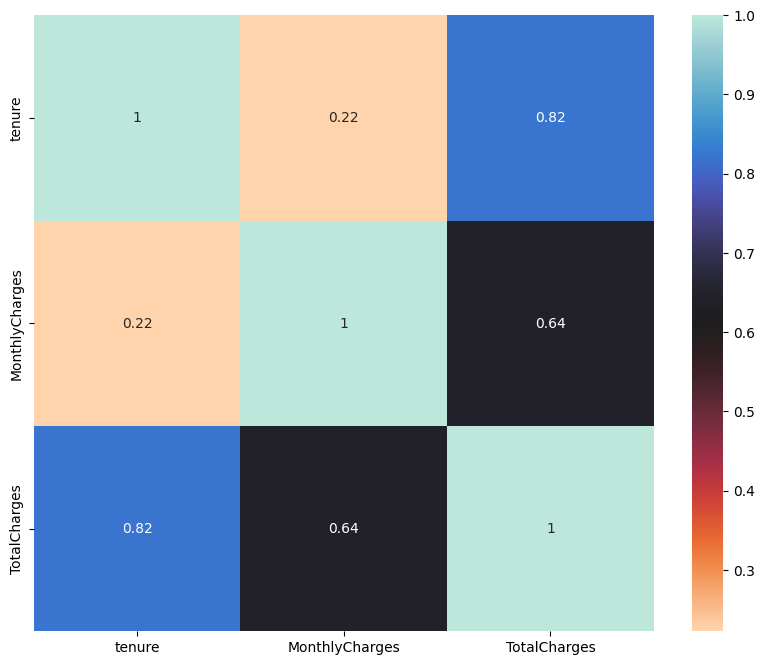

In [92]:
# now lets look at the relationship between numeric columns
# select numeric columns
df1=df_train.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn', 'tenure_group'], axis=1)
df1.columns

correlation = df1.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot = True,cmap='icefire_r')

In [ ]:
# performing feature selection
coff=abs(correlation['tenure'])
coff=coff[coff>0.02]
coff.sort_values(ascending=False)

tenure            1.000000
TotalCharges      0.821998
MonthlyCharges    0.222417
Name: tenure, dtype: float64

### we can see that the number of months the customer has stayed with the company(tenure) has high correlation of 0.82 with the total amount charged to the customer(TotalCharges) compared to the amount charged to the customer monthly(MonthlyCharges). Hence, the tenure period of a customers is determined by long term charges compared to monthly charges

### Hypothesis Testing

In [93]:
gc=pd.crosstab(df_train.Contract,df_train.Churn)
gc

Churn,No,Yes
Contract,,
Month-to-month,1513,1128
One year,930,122
Two year,1212,30


In [94]:
chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=857.16


### Since the p-value is less than alpha, we reject Ho and conclude that is there is a statistical significance association between Churn and Contract.

## 4 Modelling

### At this stage we start training our data using different models to predict whether a customer will churn or not.
### Some of the models will be testing include:
1. Random Forest Classifier
2. Decision Tree Classifier
3. Ada Boost Classifier
4. Logistic Regression
5. Gradient Boosting Classifier

In [95]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [96]:
# drop the column we featured during visualization
df_train.drop('tenure_group', axis=1, inplace =True)

In [97]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
# lets look at the number of numerical and categorical columns in our training set
num_columns=df_train.select_dtypes(include=np.number).columns.tolist()
cat_columns=df_train.select_dtypes(exclude=np.number).columns.tolist()
print(f"numeric features : {len(num_columns)}")
print(f"categorical features : {len(cat_columns)}")

numeric features : 3
categorical features : 17


### 4.1 Split Train Dataset

In [99]:
# lets separate the dependent and independent/target variable
X = df_train.drop('Churn', axis=1)
y = df_train['Churn']

X_test = df_test
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape, y_train.shape),(X_eval.shape, y_eval.shape),(X_test.shape)

(((3454, 19), (3454,)), ((1481, 19), (1481,)), (1958, 19))

In [100]:
# lets check if their is any missing value
X_train.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       198
InternetService       0
OnlineSecurity      441
OnlineBackup        441
DeviceProtection    441
TechSupport         441
StreamingTV         441
StreamingMovies     441
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
dtype: int64

In [101]:
y_train.isna().sum()

0

In [102]:
X_eval.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines        68
InternetService       0
OnlineSecurity      179
OnlineBackup        179
DeviceProtection    179
TechSupport         179
StreamingTV         179
StreamingMovies     179
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          3
dtype: int64

In [103]:
y_eval.isna().sum()

0

In [104]:
X_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## 4.2 Impute missing values

In [105]:
# applying an ML model to predict the missing values
num_imputer=SimpleImputer(strategy='median')

In [106]:
# selecting numerical columns to impute the missing values with median
num_X_train = X_train.select_dtypes(exclude='object')
num_X_eval = X_eval.select_dtypes(exclude= 'object')
num_X_test = X_test.select_dtypes(exclude= 'object')

In [107]:
# fitting the imputer to the training set
num_imputer.fit(num_X_train)

SimpleImputer(strategy='median')

In [108]:
# transforming the train set and converting the array to a dataFrame
fnum_X_train = pd.DataFrame(num_imputer.transform(num_X_train), columns=num_X_train.columns, index=num_X_train.index)

In [109]:
# transforming the eval set and converting the array to a dataFrame
num_imputer.transform(num_X_eval)
fnum_X_eval = pd.DataFrame(num_imputer.transform(num_X_eval), columns=num_X_eval.columns, index=num_X_eval.index)

In [110]:
# transforming the test set and converting the array to a dataFrame
num_imputer.transform(num_X_test)
fnum_X_test = pd.DataFrame(num_imputer.transform(num_X_test), columns=num_X_test.columns, index=num_X_test.index)

In [111]:
# imputing categorical columns
cat_X_train = X_train.select_dtypes(include='object')
cat_X_eval = X_eval.select_dtypes(include='object')
cat_X_test = X_test.select_dtypes(include='object')

In [112]:
# applying an ML model to predict the missing values
cat_imputer=SimpleImputer(strategy='most_frequent')

In [113]:
# fitting the imputer to the training set
cat_imputer.fit(cat_X_train)

SimpleImputer(strategy='most_frequent')

In [114]:
# transforming the train set and converting the array to a dataFrame
fcat_X_train = pd.DataFrame(cat_imputer.transform(cat_X_train), columns=cat_X_train.columns, index=cat_X_train.index)

In [115]:
# transforming the eval set and converting the array to a dataFrame
cat_imputer.transform(cat_X_eval)
fcat_X_eval = pd.DataFrame(cat_imputer.transform(cat_X_eval), columns=cat_X_eval.columns, index=cat_X_eval.index)

In [116]:
# transforming the test set and converting the array to a dataFrame
cat_imputer.transform(cat_X_test)
fcat_X_test = pd.DataFrame(cat_imputer.transform(cat_X_test), columns=cat_X_test.columns, index=cat_X_test.index)

### we have now imputed missing values. lets now transform the attributes 

## 4.3 Feature Engineering
### Feature engineering is a critical step in the machine learning pipeline where you create new features or modify existing ones to improve the performance of your model. It involves selecting, transforming, and creating features from your raw data to make it more suitable for machine learning algorithms. Well-engineered features can help the model better capture patterns and relationships within the data, leading to improved predictive power.

## 4.3.1 Feature Scaling
### Standardize or normalize numerical features to ensure that they have similar scales. This helps algorithms that rely on distance or magnitude, such as k-nearest neighbors and gradient descent-based methods.

In [117]:
# lets normalize the train, eval and test sets using standard scaler
stds = StandardScaler()
snum_X_train= pd.DataFrame(stds.fit_transform(fnum_X_train), columns= fnum_X_train.columns, index= fnum_X_train.index)
snum_X_eval= pd.DataFrame(stds.transform(fnum_X_eval), columns= fnum_X_eval.columns, index= fnum_X_eval.index)
snum_X_test= pd.DataFrame(stds.transform(fnum_X_test), columns= fnum_X_test.columns, index= fnum_X_test.index)

In [118]:
snum_X_train.head()

,tenure,MonthlyCharges,TotalCharges
2629,-0.259173,-1.497441,-0.782469
56,1.224626,1.161137,1.770349
1309,0.400293,-0.456401,-0.076831
695,0.070560,0.609704,0.232623
1881,1.471926,-1.502454,-0.410888


### 4.3.2Encoding

In [119]:
# encoding the categorical features
# instanciate the encoder
enc = OneHotEncoder()
# fit and transform the train set to an array and convert to DataFrame
tcat_X_train = pd.DataFrame(enc.fit_transform(fcat_X_train).toarray(), index= fcat_X_train.index, columns=enc.get_feature_names_out(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [121]:
tcat_X_train.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2629,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
56,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1309,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
695,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1881,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [122]:
# transform the evaluation set to an array and convert to DataFrame
tcat_X_eval = pd.DataFrame(enc.transform(fcat_X_eval).toarray(), index= fcat_X_eval.index, columns=enc.get_feature_names_out(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [123]:
# transform the test set to an array and convert to DataFrame
tcat_X_test = pd.DataFrame(enc.transform(fcat_X_test).toarray(), index= fcat_X_test.index, columns=enc.get_feature_names_out(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [124]:
# combining the scaled numeric and encoded categorical features for both train, eval and test sets

final_X_train = pd.merge(left=snum_X_train, right=tcat_X_train, how='outer', left_index=True, right_index= True)
final_X_eval = pd.merge(left=snum_X_eval, right=tcat_X_eval, how='outer', left_index= True, right_index=True)
final_X_test = pd.merge(left=snum_X_test, right=tcat_X_test, how='outer', left_index= True, right_index=True)

In [125]:
final_X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.877423,0.653150,-0.561785,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.001073,-1.487415,-0.951573,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.259173,0.561244,-0.049765,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.259173,0.487720,-0.063975,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.330806,0.810225,-0.992717,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [126]:
final_X_train.shape

(3454, 53)

In [127]:
final_X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2629,-0.259173,-1.497441,-0.782469,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
56,1.224626,1.161137,1.770349,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1309,0.400293,-0.456401,-0.076831,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
695,0.070560,0.609704,0.232623,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1881,1.471926,-1.502454,-0.410888,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### 4.4 Balance Data

### Balancing the data is important when you have imbalanced classes in a classification problem, meaning one class has significantly more samples than the other. Imbalanced data can lead to biased model training and inaccurate predictions, as the model may become biased towards the majority class. We have an imbalanced data as 74% of the total customers did not churn while 26% churned. this implies that we have to balance our data before training the model

In [128]:
# Apply SMOTE to balance the data. 
# SMOTE generates synthetic samples for the minority class to match the number of samples in the majority class.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled, = smote.fit_resample(final_X_train, y_train)

# Print the value counts of the target variable before and after applying SMOTE to verify that the classes are balanced.
print("Before SMOTE:")
print(y.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Churn
No     3655
Yes    1280
Name: count, dtype: int64

After SMOTE:
Churn
No     2581
Yes    2581
Name: count, dtype: int64


In [129]:
final_X_eval.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1972,-1.165940,-1.495770,-0.979927,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4683,1.142193,1.560509,2.021186,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
151,1.513143,1.445209,2.489464,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2423,-1.042290,0.693254,-0.739460,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1412,0.400293,-0.001886,0.259157,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## 4.5 Model Training

### here we create instances of different models (Logistic Regression, Random Forest, Decision Tree, Ada Boost and Gradient Boosting Classifier) and add them to the models dictionary. Then, we loop through each model, train it on our training data, evaluate it on your evaluation data, and print their evaluation metrics, which include accuracy, precision, recall and Roc auc scores.

## since our target is balance we decided to exclude the f1 score

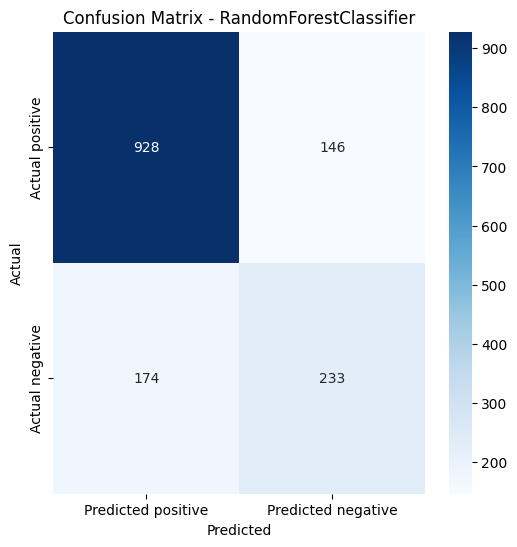

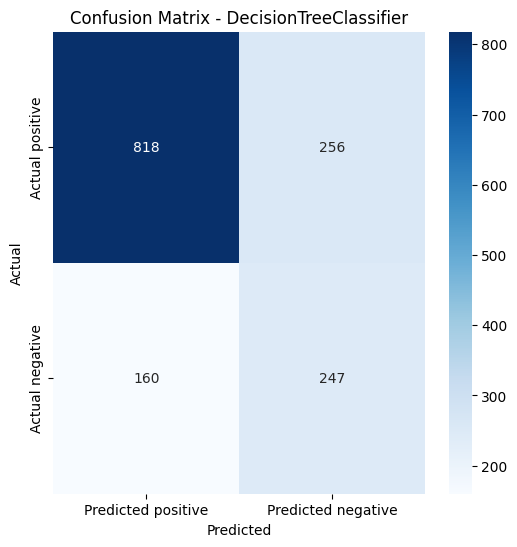

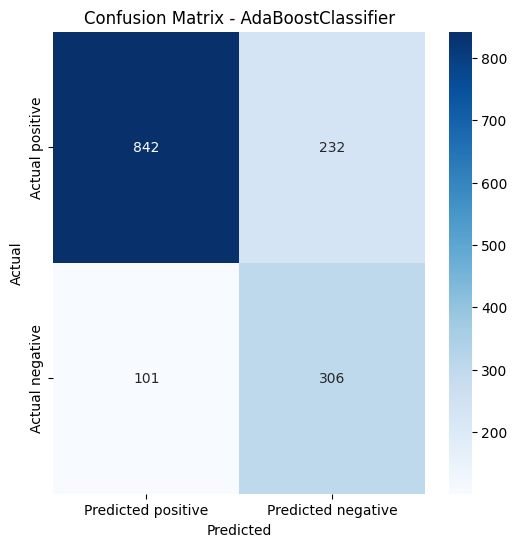

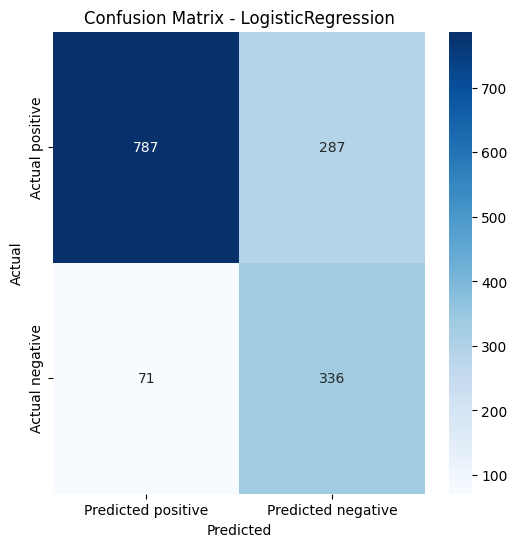

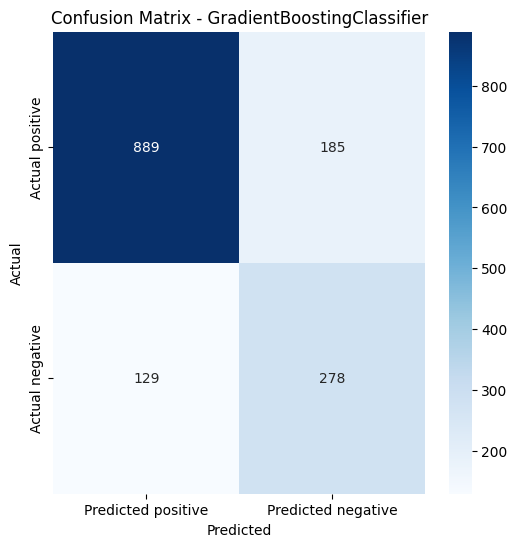

Model: RandomForestClassifier
Accuracy: 0.7839
Precision: 0.6148
Recall: 0.5725
Model: DecisionTreeClassifier
Accuracy: 0.7191
Precision: 0.4911
Recall: 0.6069
Model: AdaBoostClassifier
Accuracy: 0.7752
Precision: 0.5688
Recall: 0.7518
Model: LogisticRegression
Accuracy: 0.7583
Precision: 0.5393
Recall: 0.8256
Model: GradientBoostingClassifier
Accuracy: 0.7880
Precision: 0.6004
Recall: 0.6830


In [132]:
# lets create a function to loop through all the models
# defining a list to host all the classifiers we will use for training
classifiers= [
RandomForestClassifier(random_state=42),
DecisionTreeClassifier(random_state=42),
AdaBoostClassifier(random_state=42),
LogisticRegression(random_state=42),
GradientBoostingClassifier(random_state=42),

]

# creating empty dictionaries to store the models and evaluation metrics
trained_models=[]
models = {}
accuracies = {}
precisions = {}
recalls = {}


# training and evaluating each model
# training and evaluating each model
for classifier in classifiers:
    model_name= classifier.__class__.__name__ # Get the name of the classifier's class
    model = classifier.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(final_X_eval)
    models[model_name] = model
    accuracies[model_name] = accuracy_score(y_eval, y_pred)
    precisions[model_name] = precision_score(y_eval, y_pred, pos_label='Yes')
    recalls[model_name] = recall_score(y_eval, y_pred, pos_label='Yes')
 
    

    # Append the trained model to the list
    trained_models.append(model)
# printing the model names and the scores of evaluation metrics
    cm = confusion_matrix(y_eval, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted positive', 'Predicted negative'], yticklabels=['Actual positive', 'Actual negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# printing the model names and the scores of evaluation metrics
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracies[model_name]:.4f}")
    print(f"Precision: {precisions[model_name]:.4f}")
    print(f"Recall: {recalls[model_name]:.4f}")
  


### from the results above the Gradient Boosting classifier is the best model with an accuracy score 79% followed by Random Forest with a score of 78%. The random forest has correctly predicted 927 positive instances and 235 negative instances, while Gradient boosting has correctly predicted 889 positive instances and 278 negative instances. 

### Accuracy measures the proportion of correctly classified instances out of the total instances. It's a basic metric that gives an overall view of the model's correctness.

### In this analysis,  we want to find a model that can accurately classify churn instances and from the results we can see that Gradient Boosting, Random Forest and Ada Boost Classifiers have the highest accuracies of 78.8%, 78.5% and 77.5%

## 4.6 Model Improvement
### Model improvement in machine learning involves various strategies to enhance the performance of a model and achieve better predictive accuracy.

## 4.6.1 Hyperparameters Tuning

### Fine tune the top k models (3<k<5) using a GridsearchCV (that is in sklearn.model_selection) fo find the best hyperparameters and achieve the maximum performance of each of the top k models, then compare them again to select the best one.

In [133]:
 # retrieving the parameters of Gradient Boosting Classifier
print(trained_models[4].get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [134]:
# initializing an empty list named best_models_trained to store the trained models that perform the best 
best_models_trained=[]

In [135]:
# Create an instance of LabelEncoder and fit it to the target variable y
le=LabelEncoder().fit(y)

## Hyperparameter Tuning of Gradient Boosting Classifier Model

In [136]:
trained_models[4].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [137]:
# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
grid_search = GridSearchCV(estimator=trained_models[4], param_grid=param_grid, scoring='accuracy', refit=True, cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_resampled, le.transform(y_train_resampled))

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("Best model:", grid_search.best_estimator_)
# Get the best trained model
best_models_trained.append(grid_search.best_estimator_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8;, score=0.744 total time=   3.4s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8;, score=0.780 total time=   3.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8;, score=0.778 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8;, score=0.797 total time=   2.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8;, score=0.832 total time=   2.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0;, score=0.744 total time=   3.1s
[CV 2/5] END learning_rate=0.0

### The model has a best accuracy score of 85% with best parameters including {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

## Hyperparameter Tuning of Ada Boost Classifier Model

In [138]:
# retrieving the parameters of Ada Boost Classifier
trained_models[2].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [139]:
# define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
grid_search = GridSearchCV(estimator=trained_models[2], param_grid=param_grid, scoring='accuracy', refit=True, cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_resampled, le.transform(y_train_resampled))

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("Best model:", grid_search.best_estimator_)
# Get the best trained model
best_models_trained.append(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.725 total time=   1.5s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.746 total time=   2.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.754 total time=   1.8s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.755 total time=   1.1s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.775 total time=   1.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.725 total time=   2.8s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.746 total time=   2.7s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.754 total time=   2.5s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.755 total time=   2.6s
[CV 5/5] END algorithm=SAMME, learning_rate=

### the Ada Boost Model has the best accuracy score of 84% with best parameters including {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}

## Hyperparameter Tuning of Random Forest Model

In [140]:
trained_models[0]

RandomForestClassifier(random_state=42)

In [141]:
# retrieving the parameters of Random Forest
trained_models[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [142]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
grid_search = GridSearchCV(estimator=trained_models[0], param_grid=param_grid, scoring='accuracy', refit=True, cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_resampled, le.transform(y_train_resampled))

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("Best model:", grid_search.best_estimator_)
# Get the best trained model
best_models_trained.append(grid_search.best_estimator_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=

### we can see that the model has a best accuracy score of 88% with best parameters of {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}.

## 4.7 Model Improvement and Comparison

In [146]:
%pip install tabulate


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [147]:
# lets have a look at the performance of the models after tuning the parameters
data = {
    'Model': ['RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier'],
    'Best_params': [
        {'max_features': 'log2', 'n_estimators': 300, 'random_state': 42},
        {'n_estimators': 200, 'random_state': 42},
        {'max_depth': 5, 'random_state': 42, 'subsample': 0.8}
    ],
    'Best accuracy': [0.8779, 0.8413, 0.8566,]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data).sort_values(by='Best accuracy', ascending=False)

# Convert DataFrame to Markdown table
markdown_table = df.to_markdown(index=False)

# Print the Markdown table
print(markdown_table)


| Model                      | Best_params                                                       |   Best accuracy |
|:---------------------------|:------------------------------------------------------------------|----------------:|
| RandomForestClassifier     | {'max_features': 'log2', 'n_estimators': 300, 'random_state': 42} |          0.8779 |
| GradientBoostingClassifier | {'max_depth': 5, 'random_state': 42, 'subsample': 0.8}            |          0.8566 |
| AdaBoostClassifier         | {'n_estimators': 200, 'random_state': 42}                         |          0.8413 |


### From the results of the hyperparameter tuning we can see that Random Forest Classifier is the best model to make predictions on customer churn with an accuracy of almost 88% followed closely by Gradient boosting with 86% accuracy. however, lets use the best parameters on the evaluation test to further compare the performance of the models.

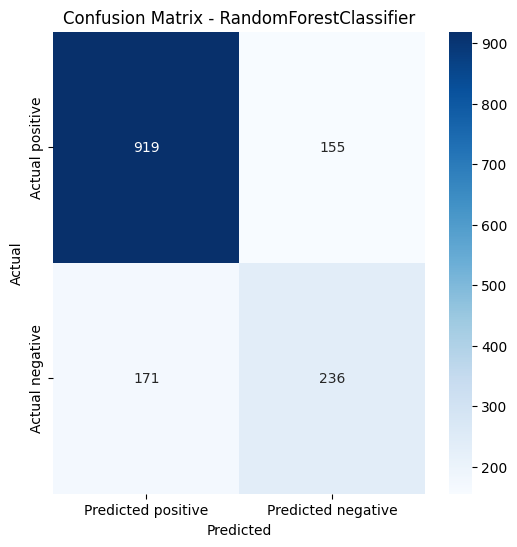

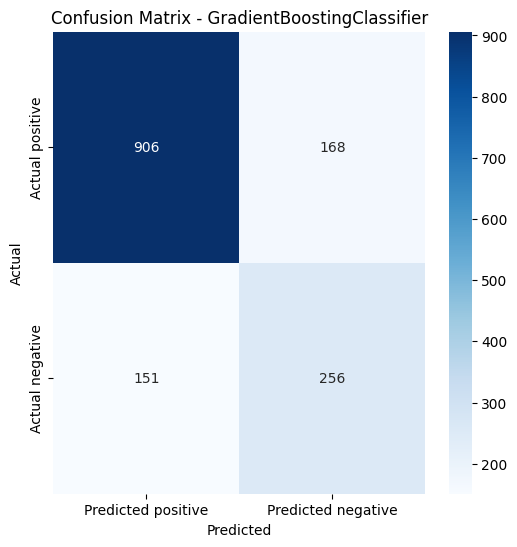

Model: RandomForestClassifier
Accuracy: 0.7799
Precision: 0.6036
Recall: 0.5799
Model: GradientBoostingClassifier
Accuracy: 0.7846
Precision: 0.6038
Recall: 0.6290


In [148]:
# defining the models with best parameters
best_models= [
RandomForestClassifier(max_features='log2', n_estimators=300, random_state=42),
GradientBoostingClassifier(max_depth=5, random_state=42, subsample=0.8),

]
# creating empty dictionaries to store the models and evaluation metrics
compare_models=[]
models = {}
accuracies = {}
precisions = {}
recalls = {}


# training and evaluating each model
# training and evaluating each model
for best_model in best_models:
    model_name= best_model.__class__.__name__ # Get the name of the classifier's class
    model = best_model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(final_X_eval)
    models[model_name] = model
    accuracies[model_name] = accuracy_score(y_eval, y_pred)
    precisions[model_name] = precision_score(y_eval, y_pred, pos_label='Yes')
    recalls[model_name] = recall_score(y_eval, y_pred, pos_label='Yes')
   

    # Append the trained model to the list
    compare_models.append(model)

    # printing the model names and the scores of evaluation metrics
    cm = confusion_matrix(y_eval, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted positive', 'Predicted negative'], yticklabels=['Actual positive', 'Actual negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# printing the model names and the scores of evaluation metrics
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracies[model_name]:.4f}")
    print(f"Precision: {precisions[model_name]:.4f}")
    print(f"Recall: {recalls[model_name]:.4f}")
   

### The scores of the two models on the evaluation dataset shows that the Gradient Boosting classifier has the highest accuracy of 78.5% while Random Forest classifier has an accuracy of 78.1%. looking at the confusion matrix the Random Forest model correctly predicted 919 instances as positive out of the 1074 instances and correctly predicted 237 instances as negative out of the 407 instances. on the other hand, Gradient boosting correctly predicted 909 instances as positive out of the 1074 instances and correctly predicted 256 instances as negative out of the 407 instances. Hence, the Random Forest model has predicted more instances in the positive class, while the Gradient boosting has predicted more instances in the negative class. however, the margin of difference in prediction of the positive class is insignificant compared to the margin in the negative class. Hence, we choose the Random Forest classifier as the best model for predicting customer churn as it provides a balances between predicting positive and negative instances, and also its high acccuracy score of 88% on training data.

## 5 Saving the model

### Pickle is the standard way of serializing objects in Python. we will use the pickle operation to serialize our machine learning algorithm and save the serialized format to a file

In [150]:
import pickle
# saving our best model
customer_churn_model = RandomForestClassifier(max_features='log2', n_estimators=300, random_state=42)

# Save the model to a file using pickle
with open('customer_churn_model.pkl', 'wb') as model_file:
    pickle.dump(customer_churn_model, model_file)

In [151]:
# Load the model from the saved file
with open('customer_churn_model.pkl', 'rb') as model_file:
    loaded_churn_model = pickle.load(model_file)

# Now we can use loaded_churn_model for predictions and evaluation

## Evaluation
### 5.1 Testing of Predictions

In [152]:
# fit the model on the train data
model = loaded_churn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
test_predictions = model.predict(final_X_test)

test_predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

###  we can see the predicted class labels for the test data based on the best-trained Gradient Boosting Classifier model.

## 6 Export Key Components

### Here we export the important ML objects that will be used to develop an app: encoder, scaler, column transformer, models e.t.c

In [153]:
# define the components to be exported 
components= {
    'num_imputer': num_imputer,
    'cat_imputer': cat_imputer,
    'scaler': stds,
    'encoder': enc,
    'models': trained_models

}

In [154]:
# create a directory named "export"
!mkdir export

### This is the directory that we will use to save the components and requirements.

In [156]:

# create a path to the "export" directory
destination= os.path.join(".","export")

### The dot "." represents the current working directory, which is the directory where our Jupyter Notebook is located.The second argument is "export", which is the directory we want to create inside the current working directory. When we call os.path.join(".", "export"), it joins the current working directory with the "export" directory, effectively creating the full path to the "export" directory in the current working directory.

In [157]:
# save the components object as a pickled file 
with open(os.path.join(destination, "ml.pkl"), "wb") as f:
    pickle.dump(components, f)

## The code above is using the pickle.dump() function to save the serialized 'components' object to a binary file named "ml.pkl" inside the "export" directory. we can later load this object back into memory using pickle.load() to use the components data.

In [158]:
# save the list of installed Python packages along with their versions into a text file
!pip freeze > export/requirements.text

## the code above is used to create a text file named "requirements.txt" inside the "export" directory. This file will contain a list of all the installed Python packages and their versions in our environment.This file can be useful for recreating the same environment on another system or sharing the requirements of this project with others.